In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [90]:
data=pd.read_csv('/content/drive/MyDrive/Ml_projects/mountains_vs_beaches_preferences.csv')
data.shape

(52444, 14)

In [5]:
data.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [7]:
data.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().any()

,0
Age,False
Gender,False
Income,False
Education_Level,False
Travel_Frequency,False
Preferred_Activities,False
Vacation_Budget,False
Location,False
Proximity_to_Mountains,False
Proximity_to_Beaches,False


In [9]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
52439,False
52440,False
52441,False
52442,False


# There is no duplicates in the data


In [17]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float','int']) # Get numeric columns

# Loop through each numeric column to calculate IQR and identify outliers
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)  # First Quartile
    Q3 = data[col].quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1  # Interquartile Range

    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers and create a new column for each
    data[f'{col}_Outlier'] = (data[col] < lower_bound) | (data[col] > upper_bound)


# If needed, show the dataset with outlier flags
print(data.head())

   Age      Gender  Income Education_Level  Travel_Frequency  \
0   56        male   71477        bachelor                 9   
1   69        male   88740          master                 1   
2   46      female   46562          master                 0   
3   32  non-binary   99044     high school                 6   
4   60      female  106583     high school                 5   

  Preferred_Activities  Vacation_Budget  Location  Proximity_to_Mountains  \
0               skiing             2477     urban                     175   
1             swimming             4777  suburban                     228   
2               skiing             1469     urban                      71   
3               hiking             1482     rural                      31   
4           sunbathing              516  suburban                      23   

   Proximity_to_Beaches  ... Preference  Age_Outlier  Income_Outlier  \
0                   267  ...          1        False           False   
1       

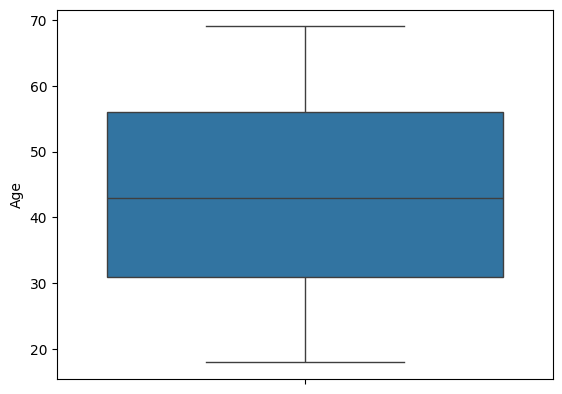

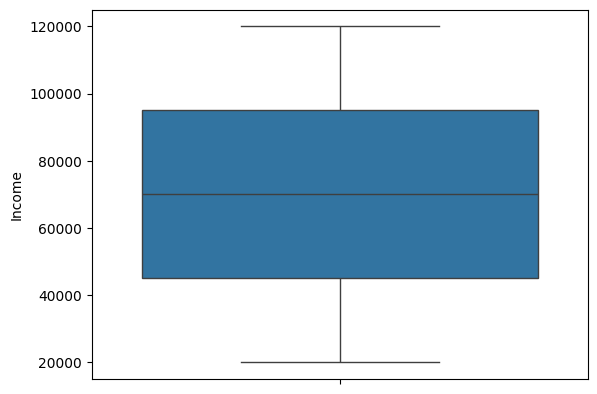

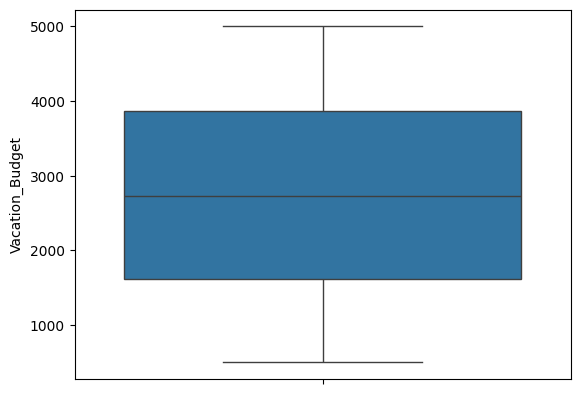

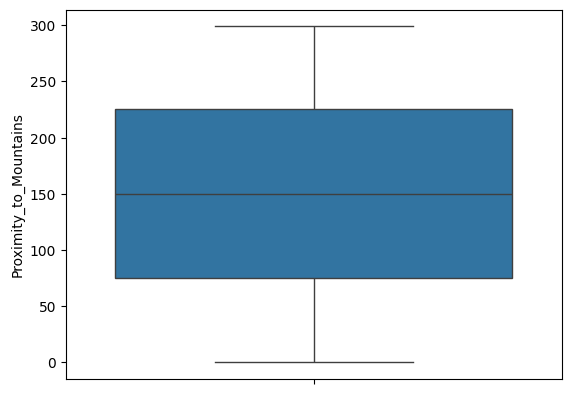

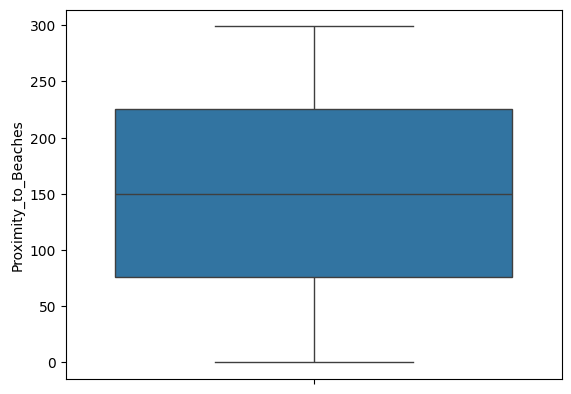

In [18]:
num_col=['Age','Income','Vacation_Budget','Proximity_to_Mountains','Proximity_to_Beaches']
for col in num_col:
  sns.boxplot(data[col])
  plt.show()

In [19]:
data=data.drop(columns=['Age_Outlier','Income_Outlier','Travel_Frequency_Outlier','Vacation_Budget_Outlier','Proximity_to_Mountains_Outlier','Proximity_to_Beaches_Outlier','Pets_Outlier','Environmental_Concerns_Outlier','Preference_Outlier'])

# identifying appropriate input features

In [20]:
numerical_data=data.select_dtypes(include=['float','int'])
correlation_with_target=numerical_data.corr()['Preference'].sort_values(ascending=False)
print(correlation_with_target)

Preference                1.000000
Proximity_to_Beaches      0.334848
Environmental_Concerns    0.001457
Age                       0.000990
Travel_Frequency         -0.001680
Income                   -0.002998
Vacation_Budget          -0.004754
Pets                     -0.011375
Proximity_to_Mountains   -0.335373
Name: Preference, dtype: float64


We visualized the relationship between categorical attributes and the target variable, highlighting patterns and distributions, and used a count plot to represent these insights

In [21]:
data=data[data['Gender']!='non-binary']
data['Preference'].value_counts()

,count
Preference,
0,26345
1,8815


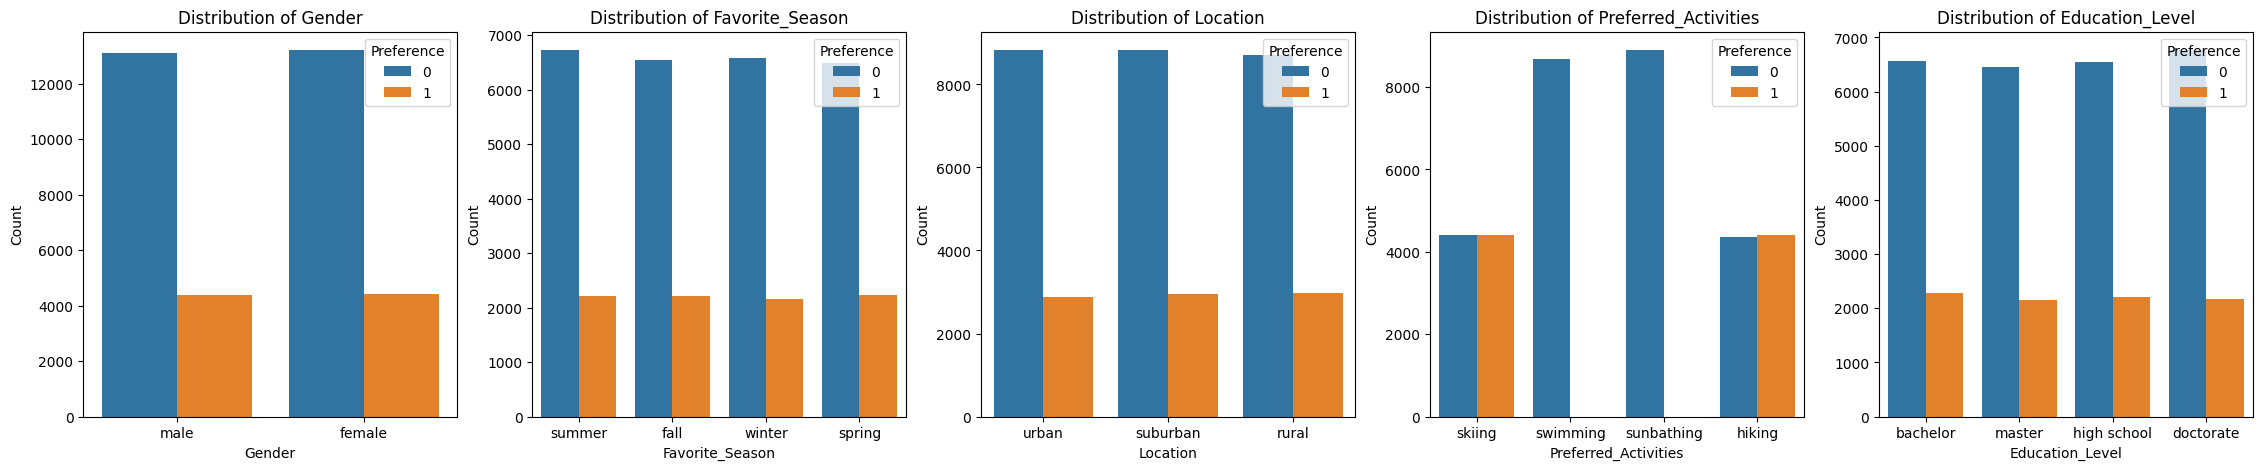

In [22]:
cat_col = ['Gender', 'Favorite_Season', 'Location', 'Preferred_Activities','Education_Level']
fig, axes = plt.subplots(1, len(cat_col), figsize=(28, 5))
for ax, col in zip(axes, cat_col):  # Use zip to pair axes and categorical columns
    sns.countplot(x=data[col], hue=data['Preference'], ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

As we can see, these categories, as well as most of them, have similar distributions, which indicates they don't significantly affect the preference prediction.

And This shows that a person's preferred activities influence their preference, and it's a very important factor for prediction..

For example, people who prefer swimming or sunbathing tend to choose beaches for their vacations.

We visualized the distribution and relationships of the numeric (continuous) data,and used a hist plot to represent these insights.

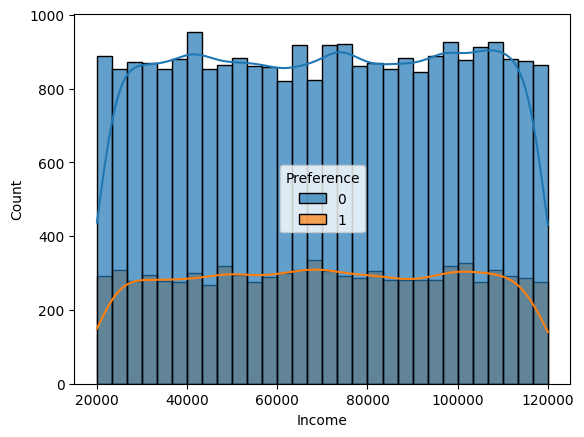

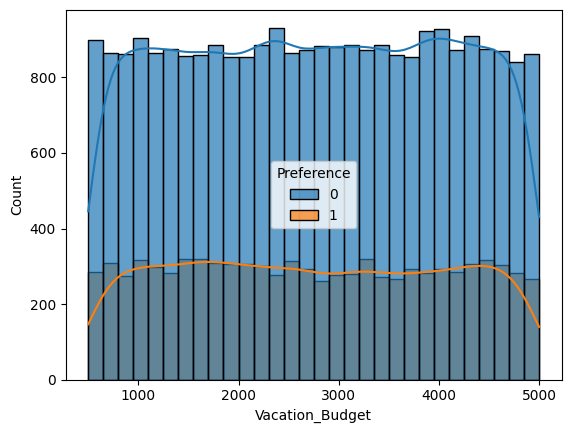

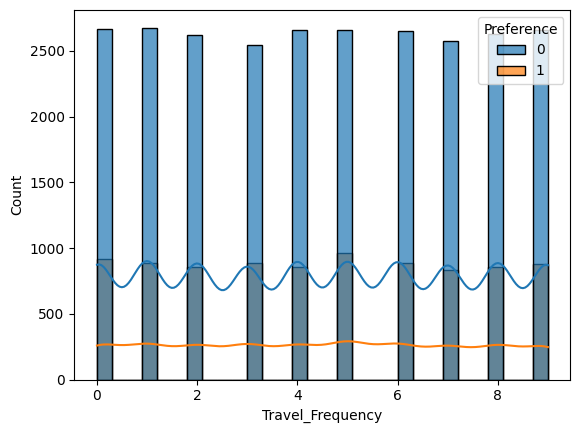

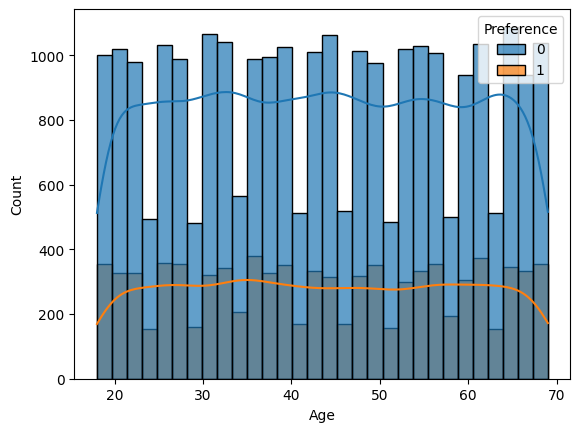

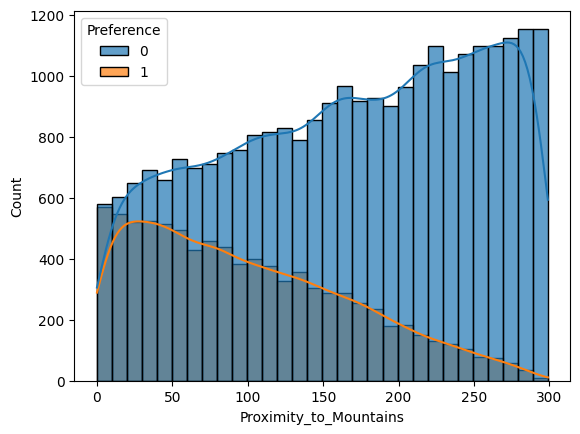

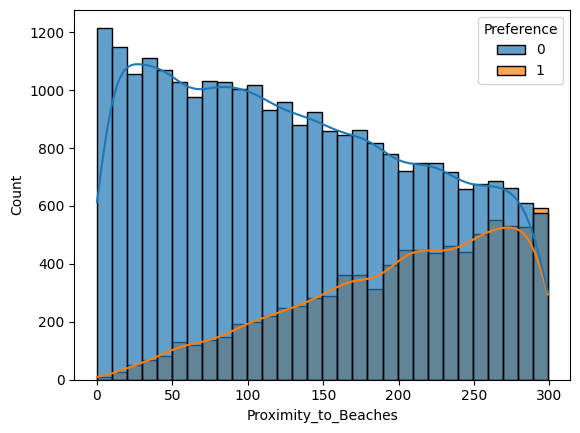

In [23]:
numerical_features =['Income','Vacation_Budget','Travel_Frequency','Age','Proximity_to_Mountains','Proximity_to_Beaches']
for feature in numerical_features:
  sns.histplot(x=feature,hue='Preference',data=data,kde=True,bins=30,color='blue',alpha=0.7)
  plt.show()

=> This shows that a person's proximity to beaches and person's proximity to mountains influences their preference, and it's a very important factors for prediction.

For example, people who live closer to beaches tend to prefer mountains for their vacations and people who live closer to mountains tend to prefer beaches for their vacations.

To summarize, user preferences are primarily influenced by three key factors:

1) Preferred Activities,

2) Proximity to Mountains, and

3) Proximity to Beaches.

All other attributes (Age, Gender, Income, Education Level, Travel Frequency,
Vacation Budget, Location, Favorite Season, Pets, and Environmental Concerns) have minimal impact on the prediction.

# Data Preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data["Gender"])
data['Education_Level'] = encoder.fit_transform(data["Education_Level"])
data['Preferred_Activities'] = encoder.fit_transform(data["Preferred_Activities"])
data['Location'] = encoder.fit_transform(data["Location"])
data['Favorite_Season']=encoder.fit_transform(data["Favorite_Season"])
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,1,71477,0,9,1,2477,2,175,267,2,0,1,1
1,69,1,88740,3,1,3,4777,1,228,190,0,0,1,0
2,46,0,46562,3,0,1,1469,2,71,280,3,0,0,1
4,60,0,106583,2,5,2,516,1,23,151,3,1,1,0
5,25,1,110588,1,3,2,2895,2,6,47,0,0,1,0


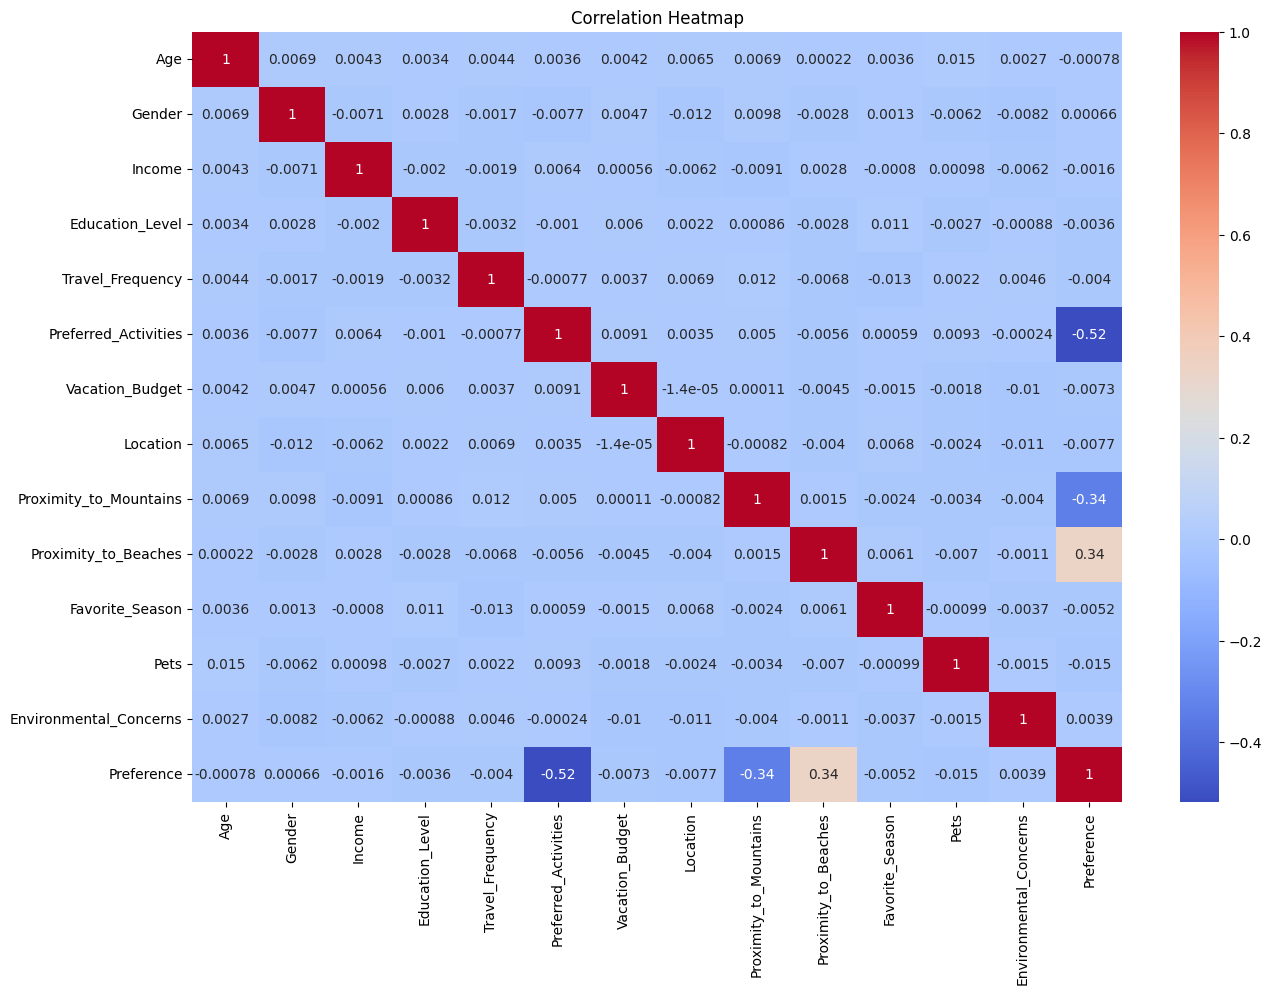

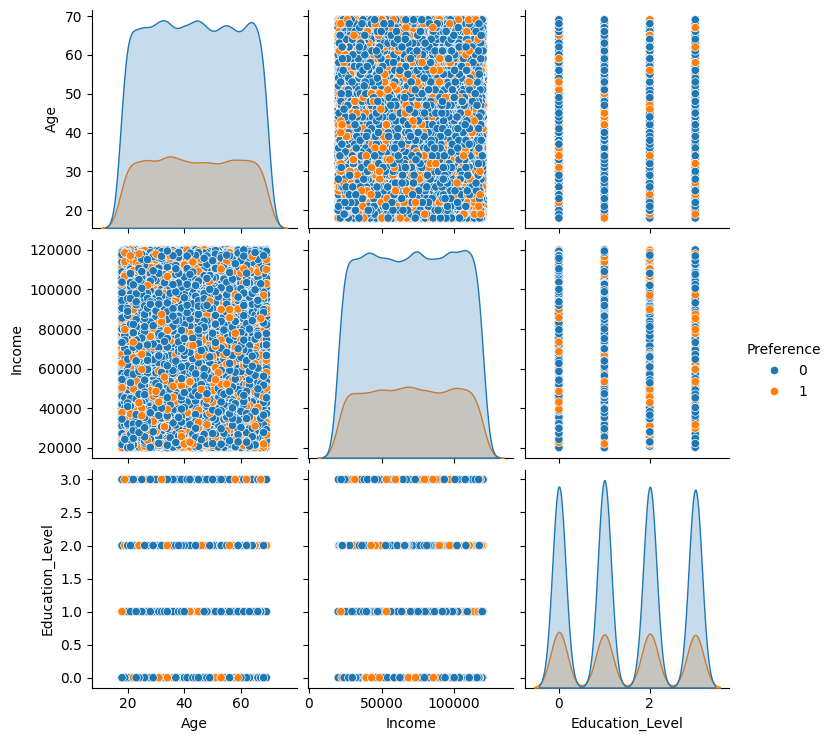

In [30]:
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Pair plot for selected features
sns.pairplot(data[['Age', 'Income', 'Education_Level', 'Preference']], hue='Preference')
plt.show()

As we can see from the correlation heatmap,¶

preferred activities have the highest correlation with preference.

Proximity to beaches and Proximity to Mountains have a slightly lower impact on preferences compared to preferred activities. The remaining attributes show very low correlation, indicating their minimal importance.


# Analysis:

# Correlation Values:

1. Correlation coefficients range between -1 and 1.
2. Values close to 1 or -1 indicate a strong positive or negative correlation.
3. Values near 0 indicate little to no correlation.

From the correlation matrix displayed, we can determine Most correlation values are very close to 0, suggesting weak or no linear relationships between features. No correlation coefficient is significantly high (e.g., above 0.8 or 0.9).

# Conclusion:

There is no multicollinearity in this dataset since the correlations between the features are very low.

In [31]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif

In [32]:
# VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
X=data.drop('Preference',axis=1)
y=data['Preference']
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit_transform(X)
selected_features_var=X.columns[var_thres.get_support()]
print(selected_features_var)

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns'],
      dtype='object')


In [33]:
# Chi-square test for feature selection
selector = SelectKBest(chi2, k=5)
X_chi2 = selector.fit_transform(X, y)
selected_features_chi2 = X.columns[selector.get_support()]

In [34]:
# Mutual Information
selector = SelectKBest(mutual_info_classif, k=10)
X_mi = selector.fit_transform(X, y)
selected_features_mi = X.columns[selector.get_support()]

In [35]:

# Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)


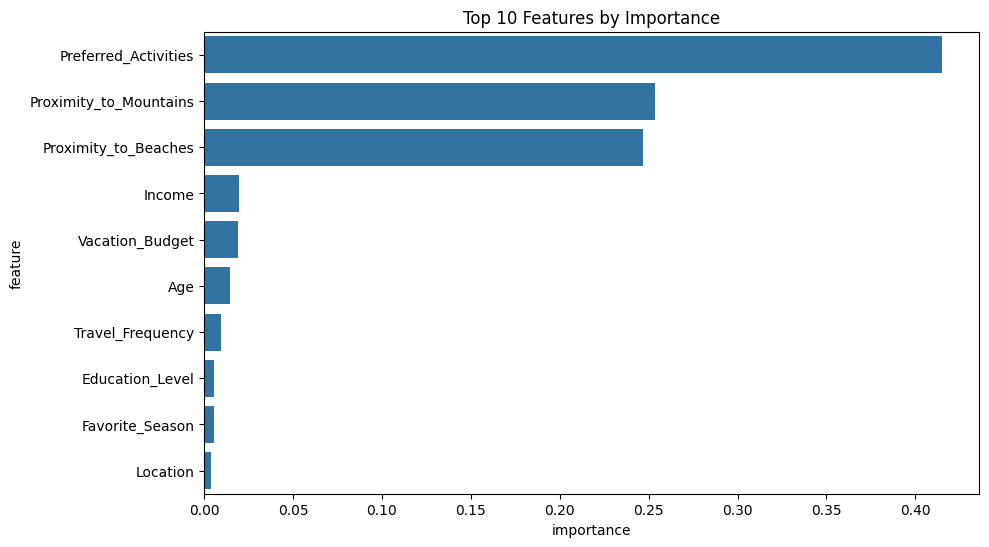

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title("Top 10 Features by Importance")
plt.show()

In [37]:
# Print selected features
print("Selected features (Variance Threshold):", selected_features_var)
print()
print("Selected features (Chi-square):", selected_features_chi2)
print()
print("Selected features (Mutual Information):", selected_features_mi)
print()
print("Top 10 features (Random Forest):", feature_importance['feature'].head(10).tolist())


Selected features (Variance Threshold): Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns'],
      dtype='object')

Selected features (Chi-square): Index(['Income', 'Preferred_Activities', 'Vacation_Budget',
       'Proximity_to_Mountains', 'Proximity_to_Beaches'],
      dtype='object')

Selected features (Mutual Information): Index(['Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Location', 'Proximity_to_Mountains',
       'Proximity_to_Beaches', 'Pets', 'Environmental_Concerns'],
      dtype='object')

Top 10 features (Random Forest): ['Preferred_Activities', 'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Income', 'Vacation_Budget', 'Age', 'Travel_Frequency', 'Education_Level', 'Favorite_Season', 'Location']


In [38]:
# Check for multicollinearity
correlation_matrix = X.corr()
high_correlation = np.where(np.abs(correlation_matrix) > 0.8)
high_correlation = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_correlation) if x != y and x < y]

In [39]:
print("Highly correlated features:")
for feat1, feat2 in high_correlation:
    print(f"{feat1} and {feat2}: {correlation_matrix.loc[feat1, feat2]:.2f}")

Highly correlated features:


In [40]:
selected_features = list(set(selected_features_var) | set(selected_features_chi2) | set(selected_features_mi) | set(feature_importance['feature'].head(10)))

In [64]:
selected_features

['Age',
 'Travel_Frequency',
 'Income',
 'Favorite_Season',
 'Pets',
 'Gender',
 'Education_Level',
 'Environmental_Concerns',
 'Vacation_Budget',
 'Proximity_to_Beaches',
 'Location',
 'Preferred_Activities',
 'Proximity_to_Mountains']

In [92]:
# Separate features and target variable
X = data.drop(columns='Preference',axis=1)
y = data['Preference']

In [93]:
X

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1
5,25,male,110588,doctorate,3,sunbathing,2895,urban,6,47,fall,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,23,male,63850,doctorate,8,sunbathing,3130,suburban,158,284,summer,1,1
52438,42,female,53330,doctorate,4,skiing,840,urban,155,200,summer,1,1
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0


In [94]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Create preprocessing pipelines
numeric_features = X.select_dtypes(include=['int64',"float"]).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [96]:
numeric_features

Index(['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets',
       'Environmental_Concerns'],
      dtype='object')

In [98]:


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [101]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,[0,2,4,6,8,9,11,12]),
        ('cat', categorical_transformer,[1,3,5,7,10])
    ])

In [102]:
# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)


}

In [103]:
for name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

In [105]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 2, 4, 6, 8, 9, 11, 12]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 3, 5, 7, 10])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [107]:
from sklearn.pipeline import make_pipeline
# Function to evaluate model with predict_proba check
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, X, y):
    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Check if predict_proba is available
    if hasattr(pipeline, "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)
        log_loss_score = log_loss(y_test, y_pred_proba)
    else:
        y_pred_proba = None
        log_loss_score = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5)

    return {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Log Loss': log_loss_score,
        'Cross-validation Score': cv_scores.mean()
    }

# Train and evaluate models
results = {}

for name, classifier in classifiers.items():
    pipeline = make_pipeline(preprocessor, classifier)
    results[name] = evaluate_model(pipeline, X_train, y_train, X_test, y_test, X, y)


In [108]:
# Print results
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


KNN:
Accuracy: 0.9204
F1 Score: 0.9188
Log Loss: 0.2973
Cross-validation Score: 0.9198

Naive Bayes:
Accuracy: 0.7496
F1 Score: 0.7664
Log Loss: 4.4611
Cross-validation Score: 0.7506

Logistic Regression:
Accuracy: 0.9970
F1 Score: 0.9970
Log Loss: 0.0324
Cross-validation Score: 0.9978

SVM:
Accuracy: 0.9899
F1 Score: 0.9899
Log Loss: 0.0237
Cross-validation Score: 0.9908

Random Forest:
Accuracy: 0.9920
F1 Score: 0.9920
Log Loss: 0.0733
Cross-validation Score: 0.9923


In [109]:
# Identify the best model
best_model = max(results, key=lambda x: results[x]['Cross-validation Score'])
print(f"\nBest model: {best_model}")


Best model: Logistic Regression


In [110]:
# Perform hyperparameter tuning for the best model
if best_model == 'Random Forest':
    param_grid = {
        'classifier__n_estimators': [100, 200, 300],  # Number of trees
        'classifier__max_depth': [None, 5, 10, 15],   # Tree depth
        'classifier__min_samples_split': [2, 5, 10],  # Min samples to split a node
        'classifier__min_samples_leaf': [1, 2, 4]     # Min samples per leaf
    }
elif best_model == 'Logistic Regression':
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__penalty': ['l1', 'l2'],  # Regularization type
        'classifier__solver': ['liblinear', 'saga'],  # Optimization solvers
        'classifier__max_iter': [100, 200, 500]  # Iteration limits
    }
else:
    param_grid = {}

In [111]:
if param_grid:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifiers[best_model])])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print("\nBest parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Evaluate the tuned model
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    log_loss_score = log_loss(y_test, y_pred_proba)
    #roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')




Best parameters: {'classifier__C': 100, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.999680050558913


In [112]:
print("\nTuned model performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_score:.4f}")
#print(f"ROC AUC: {roc_auc:.4f}")


Tuned model performance:
Accuracy: 0.9999
F1 Score: 0.9999
Log Loss: 0.0029


In [113]:
best_model= grid_search.best_estimator_

In [114]:
pickle.dump(best_model,open('estimator2.pkl','wb'))